# Labrapport Reinforcement Learning Space Invaders
<img src="SpaceInvaders.PNG" alt="Alt Text" width="400" height="250">
  
- Förklaring av modellen och Deep Learning (Q_learning):
- Genomförande: Jag gjorde laborationen både på min lokala dator och på Google Colab.  
Första steget var att göra nödvändiga uppdateringar i koden så att tensorerna blev på rätt format, samt lite andra små justeringar till Space Invaders (tex satte jag att den kan avbryta om running_rewards > 800).  
Jag började att träna på min lokala dator, men det gick så långsamt att jag efter några dagar beslutade mig för att prova använda Google Colab. Jag tog min senaste tränade .keras modell, från den lokala träningen, och läste in den i Google Colab och fortsatte träningen där. Samtidigt fortsatte träningen på min lokala dator.  
- Loggning av resultaten skedde hela tiden, mestadels "manuellt". Jag fick tidsangivelser från när .keras modellen sparades.  
- Google Colab: Jag betalade för att använda snabbare runtimes, totalt använde jag nästan 200 calculation credits. Provade med lite olika inställningar för max_memory_length (1000k, 10k, 250k), körde mest på 250k. Svårt att utvärdera vad som blev bäst, märkte ingen direkt skillnad. I Google Colab så mountade jag min egna Google Drive, där jag sparade modeller och video-filerna. I Google Colab hade jag tyvärr problem med flera saker:
1. Efter att ha kört i några timmar kom en captcha och frågade om jag var en robot. Ibland missade jag att svara på den och då slutade inlärningsprocessen.
2. Den gjorde timeout efter ett tag, pga inaktivitet. Det gick alltså inte att låta den bara jobba på tills beräknings krediterna var slut. Den längsta sammanhängande inlärningen var strax under 8h.
Omstart: varje gång som inlärningen avbröts, så laddade jag in den senast tränade modellen (.keras-filen) inför nästa omgång träning. Jag gjorde ett försök  att spara listorna med data som används i inlärningsprocessen. Det gick bra att spara dem, men de tog stor plats. Två av listorna blev snabbt 3GB+ vardera, och fyllde min Google Drive. Dessutom fick jag det inte att fungera med att använda de sparade listorna i alla fall. Detta innebär att vid varje ny start av en inlärning, så fick den börja om med att lära sig och fylla i listorna igen, oklart hur det påverkade inlärningsprocessen.  
På min lokala dator så löpte träningen på utan problem, men träningen tog i slutet cirka 3+ timmar för 10k frames.  
## Mina olika experiment
Eftersom jag upplevde att resultaten inte levde upp till förväntningarna, så gjorde jag några olika ändringar i parametrar som styr inlärningsprocessen:  
1. Lokalt på datorn: Min "baseline". Endast små ändringar mot föreläsningens CodeAlong.
2. Google Colab: Tog senaste modellen från min lokala träning, fortsatta träna den i Google Colab för att öka hastigheten. Provade att minska längden på listorna för att öka hastigheten.
3. Lokalt på datorn: Försökte få bättre utfall genom att ändra
4. Lokalt på datorn: Försökte få bättre utfall genom att ändra så att modellen tittar på 8 historiska bilder istället för 4.

## Sammanfattning av mina inställningar och övergripande resultat:
| Parameter | Lokalt_1 | Google Colab | Lokalt_2 |
|-----------|----------|--------------|----------|
|beskrivning|baselinemodell|basen var en tränad<br>baseline modell|basen var den bäst<br>presterande modellen från<br>Google Colab|
|gamma|0.99|0.99|0.99|
|epsilon (min/max)|1.0 / 0.1|0.1 / 0.1|0.1 / 0.1|
|batch size|32|32|32|
|max episodes|10k|10k|10k|
|max frames|1e7|1e7|1e7|
|epsilon_random_frames|50k|0|50k|
|epsilon_greedy_frames|1M|1M|25k|
|max_memory_length|1M|250k(10k/50k)|25k|
|max_steps_per_episode|10k|10k|10k|
|update_after_actions|4|4|8|
|update_target_network|10k|10k|10k|
|optimizer|adam|adam|adam|
|learning_rate|0.00025|0.00025|0.00025|
|num_stack (frames)|4|4|4|
|clipnorm|1.0|1.0|1.0|
|Start_time|2024-12-05 21:10:00|2024-12-10 10:44:00|2024-12-18 15:44|
|End_time|2024-12-15 07:12:00|2024-12-13 20:29:00|2024-12-19 12:16|
|Total_training_durantion|9 days 10 hours|3 days 10 hours|0 days 20.7 hours|
|Total nbr of episodes|2237|7759|5780|
|Total nbr of frames|1.31M|4.97M|3.95M|
|Best result|985|1080|1205|
|Best running_reward|355|414|412|
|video|varje 50|varje 25|varje 25|


## Val av modell:
Jag väljer att ta en modell från den perioden där running_rewards var som bäst, dvs runt kl 10 den 12/12. Det är den modellen med 5767 episoder. Jag har provat modellen och den spelar ganska okej. Men den spelar långt ifrån lika bra som en human.

## Resultat / Observationer:
### Lokalt_1:
- I början av träningen var det en stadig trend att running_reward blev bättre och bättre. Därefter skedde ett skifte till att den mer platåade ut, med en topp på 355 poäng. Under hela träningen fanns också en cyklande trend, liknande en överlagrad sinuskurva.
- I början av laborationen så tog varje 10k frames bara 5-10 minuter. Efter ett tag så tog 10k frames över tre timmar, vilket kanske kan bero på att jag använde max_memory_length = 1000000 (?). Märkte också att jag använde ungefär 40GB av mina 48GB minne på datorn. 
- Efter cirka 6 dagars träning peakade running_reward på strax över 350 för att sedan gå ner något.  
- På slutet kan man inte se att modellen förbättrades över huvud taget. Snarare kan man se en liten försämring.  

### Google Colab:
- Lät den träna mellan 10 december till 13 december. Det var flertalet avbrott, minst 10-14 stycken. Efter varje avbrott så läste jag in den senast sparade .keras modellen, att anväda som start till nästa träningsomgång.
- Modellen visar att den blir bättre än Lokalt_1, med bästa running_reward på 414.

### Lokalt_2:
- Gör en del förändringar för att undersöka om det kan ge förbättring i resultat (se tabellen för detaljer).
- Det går betydligt snabbare att träna.
- Jag skulle vilja prova att titta på fler frames än 4, men jag inser att jag inte hinner ändra så mycket i koden.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
colab = pd.read_csv('spaceinvader_colab.csv', delimiter=";") # loggfilen för google colab
local_1 = pd.read_csv('spaceinvader_local.csv', delimiter=";") # loggfilen för lokal körning 1
local_2 = pd.read_csv('spaceinvader_local_2.csv', delimiter=";") # loggfilen för lokal körning 2
colab["timestamp"] = pd.to_datetime(colab["timestamp"])
local_1["timestamp"] = pd.to_datetime(local_1["timestamp"])
local_2["timestamp"] = pd.to_datetime(local_2["timestamp"])
colab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       403 non-null    datetime64[ns]
 1   episode         403 non-null    int64         
 2   best_of_100     403 non-null    int64         
 3   running_reward  403 non-null    int64         
 4   frame_count     403 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 15.9 KB


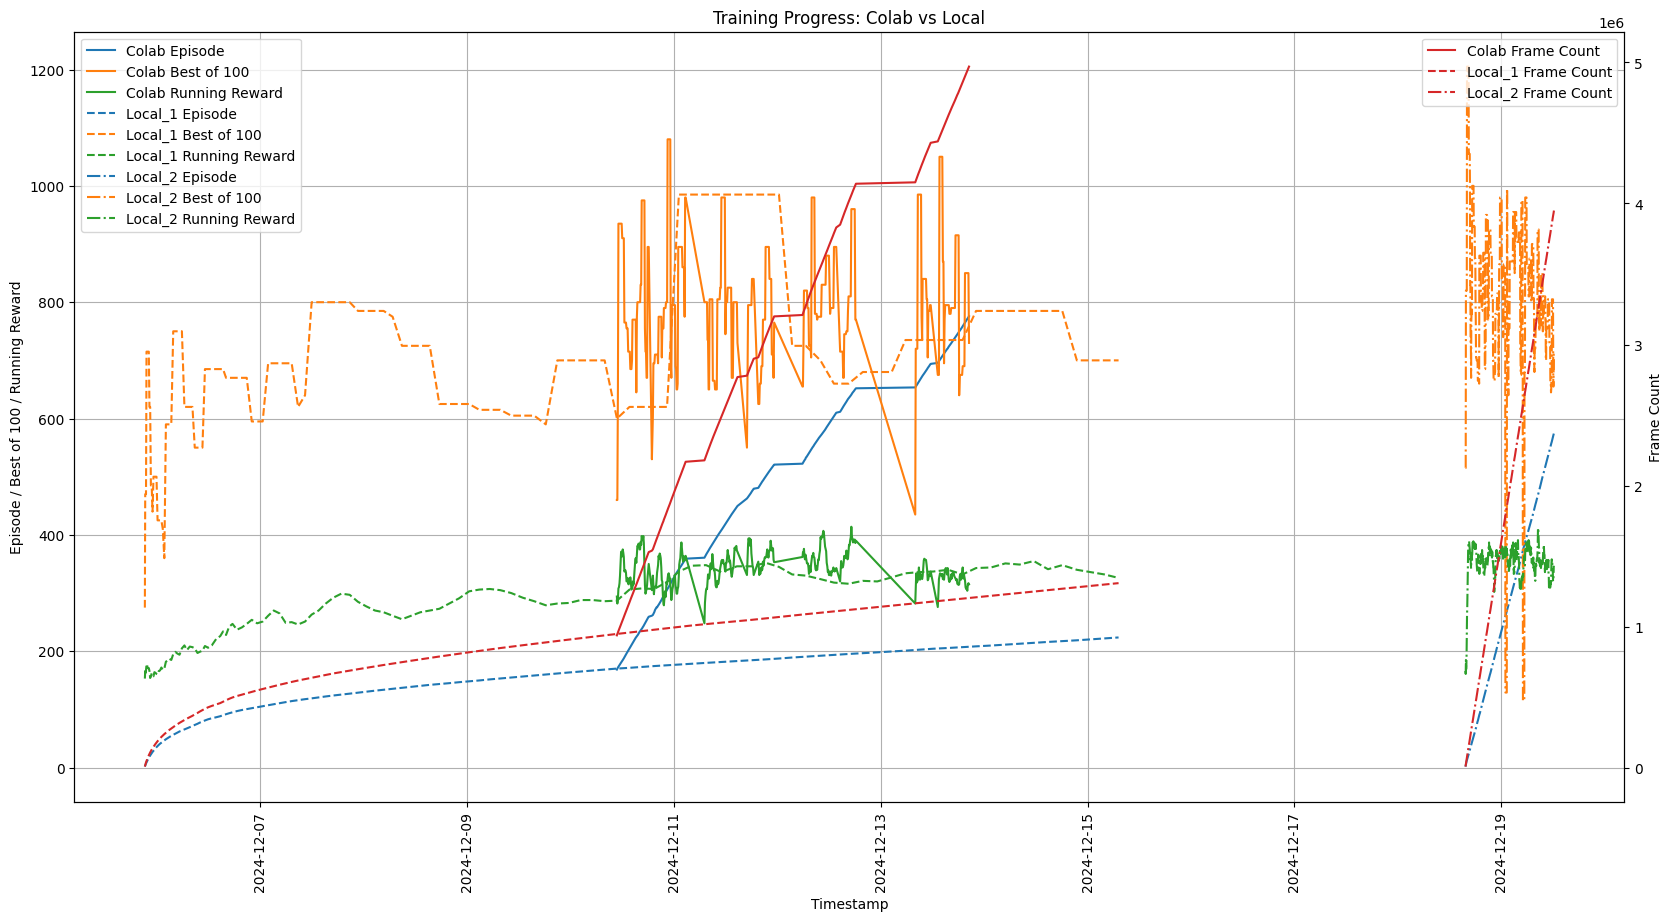

In [26]:
fig, ax1 = plt.subplots(1, 1, figsize=(20, 10))
ax1.tick_params(axis='x', rotation=90)
# Plotting episode, best_of_100, and running_reward for colab on the left y-axis
ax1.plot(colab['timestamp'], colab['episode']/10, label='Colab Episode', color='tab:blue')
ax1.plot(colab['timestamp'], colab['best_of_100'], label='Colab Best of 100', color='tab:orange')
ax1.plot(colab['timestamp'], colab['running_reward'], label='Colab Running Reward', color='tab:green')

# Plotting episode, best_of_100, and running_reward for local_1 on the left y-axis
ax1.plot(local_1['timestamp'], local_1['episode']/10, label='Local_1 Episode', linestyle='dashed', color='tab:blue')
ax1.plot(local_1['timestamp'], local_1['best_of_100'], label='Local_1 Best of 100', linestyle='dashed', color='tab:orange')
ax1.plot(local_1['timestamp'], local_1['running_reward'], label='Local_1 Running Reward', linestyle='dashed', color='tab:green')

# Plotting episode, best_of_100, and running_reward for local_2 on the left y-axis
ax1.plot(local_2['timestamp'], local_2['episode']/10, label='Local_2 Episode', linestyle='dashdot', color='tab:blue')
ax1.plot(local_2['timestamp'], local_2['best_of_100'], label='Local_2 Best of 100', linestyle='dashdot', color='tab:orange')
ax1.plot(local_2['timestamp'], local_2['running_reward'], label='Local_2 Running Reward', linestyle='dashdot', color='tab:green')

ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Episode / Best of 100 / Running Reward')
ax1.legend(loc='upper left')
ax1.grid()

# Creating a second y-axis for frame_count
ax2 = ax1.twinx()
ax2.plot(colab['timestamp'], colab['frame_count'], label='Colab Frame Count', color='tab:red')
ax2.plot(local_1['timestamp'], local_1['frame_count'], label='Local_1 Frame Count', linestyle='dashed', color='tab:red')
ax2.plot(local_2['timestamp'], local_2['frame_count'], label='Local_2 Frame Count', linestyle='dashdot', color='tab:red')
ax2.set_ylabel('Frame Count')
ax2.legend(loc='upper right')


plt.title('Training Progress: Colab vs Local')
plt.show()


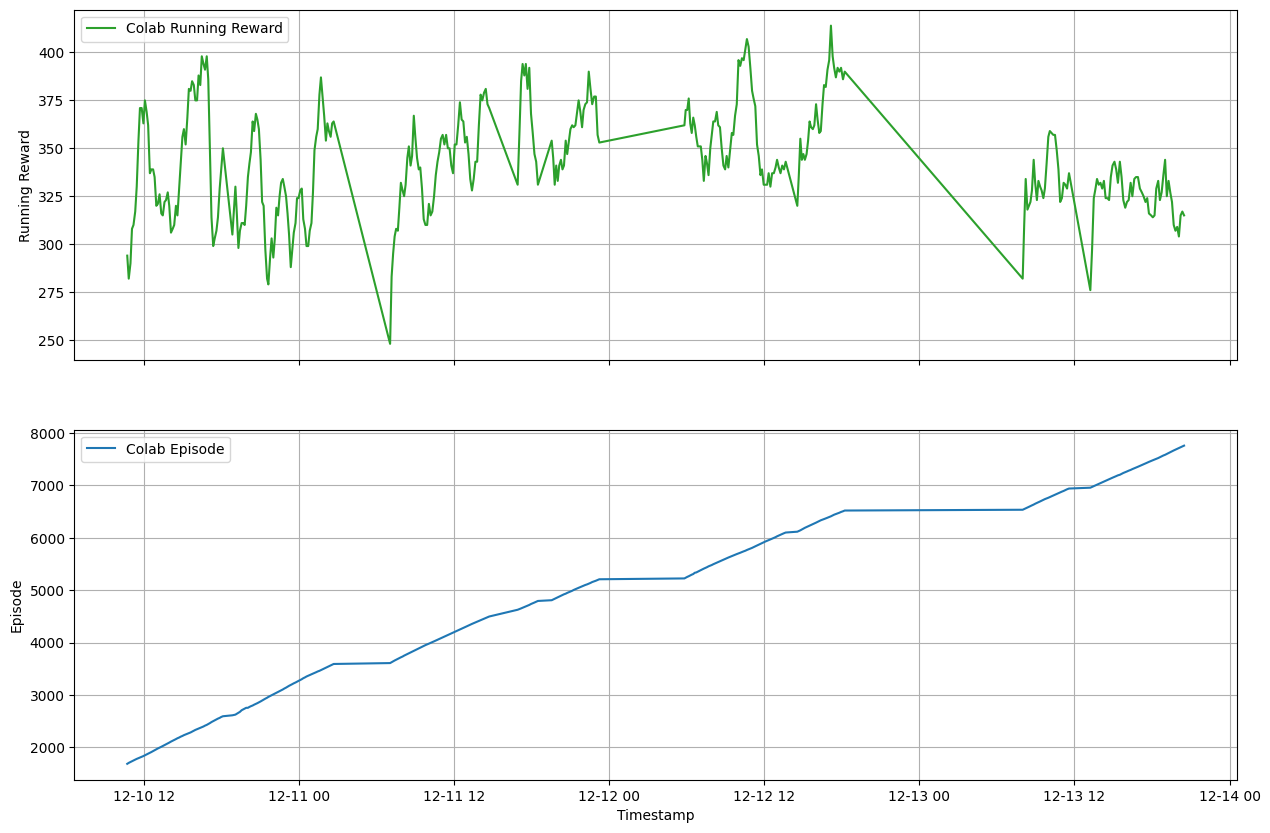

In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Plotting running_reward for colab on the upper subplot
ax1.plot(colab['timestamp'], colab['running_reward'], label='Colab Running Reward', color='tab:green')
ax1.set_ylabel('Running Reward')
ax1.legend(loc='upper left')
ax1.grid()

# Plotting episode for colab on the lower subplot
ax2.plot(colab['timestamp'], colab['episode'], label='Colab Episode', color='tab:blue')
ax2.set_xlabel('Timestamp')
ax2.set_ylabel('Episode')
ax2.legend(loc='upper left')
ax2.grid()

plt.show()
